In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime, time
import os
import pandas as pd
from scipy.interpolate import interp1d

import NEXUSFunctions as nf

import matplotlib.dates as mdates
from   pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

The starting date is: 
2022-05-09 00:00:00


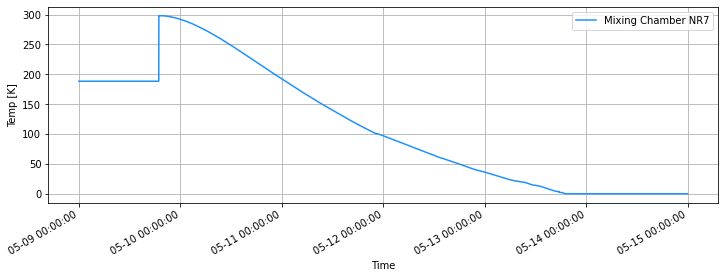

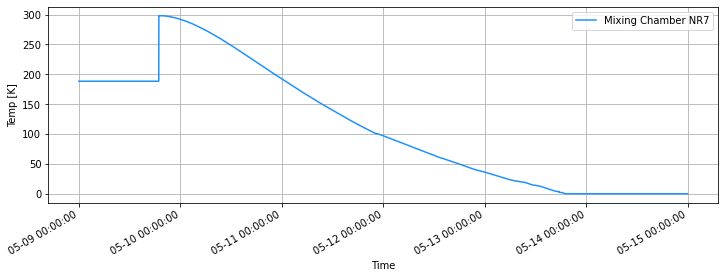

In [2]:
nf.poll_and_plot_MACRT("2022-05-09",6)

The starting date is: 
2022-05-09 00:00:00


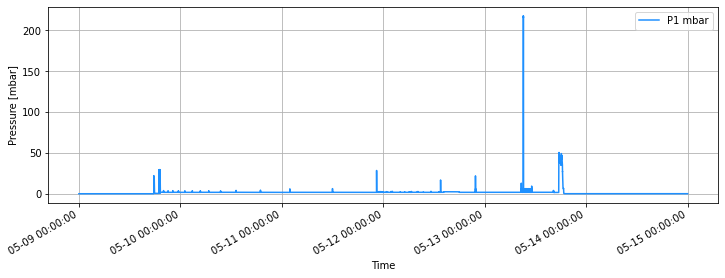

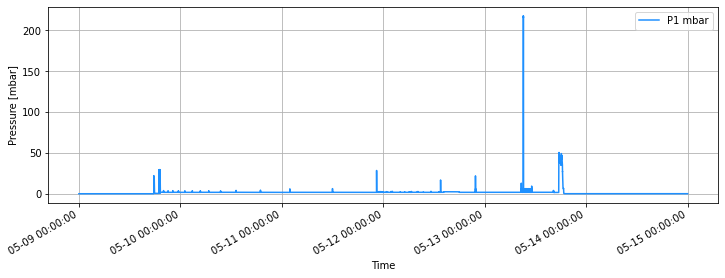

In [3]:
nf.poll_and_plot_plclog("220509",6)

In [4]:
NR14_t0 = datetime.datetime(2022, 5, 9,16,56,24)
NR15_t0 = datetime.datetime(2022,10,13, 9,11,50)
print(NR14_t0,NR15_t0)

2022-05-09 16:56:24 2022-10-13 09:11:50


In [20]:
series_plc_NR14 = nf.create_date_range("220509", 8, fmt="%y%m%d")
offset_plc_NR14 = datetime.timedelta(days=0, hours=0, minutes=0)
data_plc_NR14   = nf.read_plclog_data(series_plc_NR14, offset_plc_NR14)
print(data_plc_NR14.keys()[8])

The starting date is: 
2022-05-09 00:00:00
FLOW µm/s


In [6]:
series_plc_NR15 = nf.create_date_range("221013", 8, fmt="%y%m%d")
offset_plc_NR15 = datetime.timedelta(days=0, hours=0, minutes=0)
data_plc_NR15   = nf.read_plclog_data(series_plc_NR15, offset_plc_NR15)
# data_plc_NR15.keys()

The starting date is: 
2022-10-13 00:00:00


In [7]:
series_mmr_NR14 = nf.create_date_range("2022-05-09", 8)
offset_mmr_NR14 = datetime.timedelta(days=0, hours=0, minutes=0)
data_mmr_NR14   = nf.read_MACRT_data(series_mmr_NR14, offset_mmr_NR14)
# data_mmr_NR14.keys()

The starting date is: 
2022-05-09 00:00:00


In [8]:
series_mmr_NR15 = nf.create_date_range("2022-10-13", 8)
offset_mmr_NR15 = datetime.timedelta(days=0, hours=0, minutes=0)
data_mmr_NR15   = nf.read_MACRT_data(series_mmr_NR15, offset_mmr_NR15)
# data_mmr_NR15.keys()

The starting date is: 
2022-10-13 00:00:00


In [9]:
def pd_td_to_hrs(tdelta):
    return tdelta.total_seconds()/3600.

def pd_td_to_days(tdelta):
    return tdelta.total_seconds()/(24.*3600.)

In [10]:
NR14_time_mmr = (data_mmr_NR14['ctime']-NR14_t0).apply(pd_td_to_days)
NR15_time_mmr = (data_mmr_NR15['ctime']-NR15_t0).apply(pd_td_to_days)

NR14_time_plc = (data_plc_NR14['ctime']-NR14_t0).apply(pd_td_to_days)
NR15_time_plc = (data_plc_NR15['ctime']-NR15_t0).apply(pd_td_to_days)

## Make the temperature plot

<IPython.core.display.Javascript object>


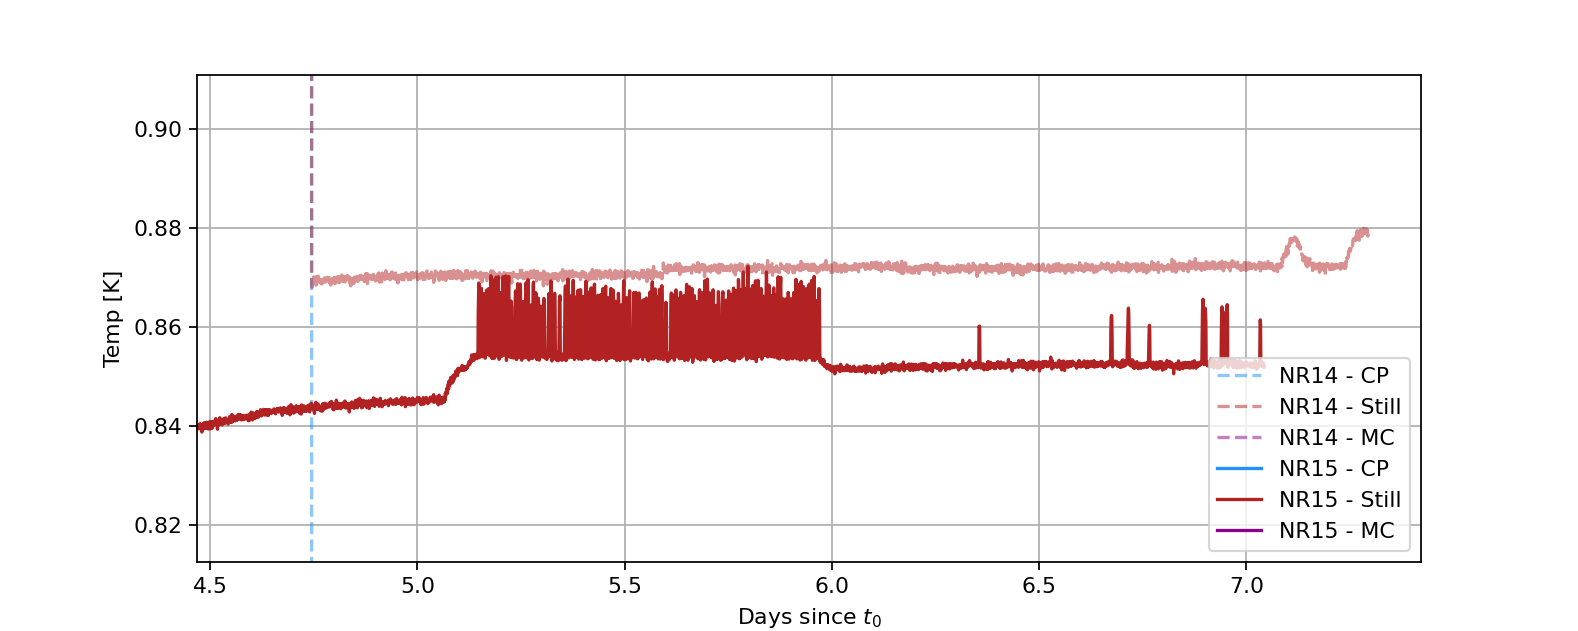

In [16]:
%matplotlib notebook
f = plt.figure(figsize = (10,4))
a = plt.gca()
a.set_xlabel(r'Days since $t_0$')
a.set_ylabel('Temp [K]')

ls_NR14 = "--"
ls_NR15 = "-"

c_CP = 'dodgerblue'
c_St = 'firebrick'
c_MC = 'darkmagenta'
c_1S = 'seagreen'
c_2S = 'goldenrod'

## Plot the MACRT data for Run 14
a.plot(NR14_time_mmr, data_mmr_NR14['COLD PLATE_Conv']  , label='NR14 - CP'   , color=c_CP, ls=ls_NR14, alpha=0.5)
a.plot(NR14_time_mmr, data_mmr_NR14['STILL_Conv']       , label='NR14 - Still', color=c_St, ls=ls_NR14, alpha=0.5)
a.plot(NR14_time_mmr, data_mmr_NR14['MIXING CHAMB_Conv'], label='NR14 - MC'   , color=c_MC, ls=ls_NR14, alpha=0.5)
# a.plot(NR14_time_mmr, data_mmr_NR14['1ST STAGE_Conv']   , label='NR14 - 1st'  , color=c_1S, ls=ls_NR14)
# a.plot(NR14_time_mmr, data_mmr_NR14['2ND STAGE_Conv']   , label='NR14 - 2nd'  , color=c_2S, ls=ls_NR14)

# ## Plot the MACRT data for Run 15
a.plot(NR15_time_mmr, data_mmr_NR15['COLD PLATE_Conv']  , label='NR15 - CP'   , color=c_CP, ls=ls_NR15)
a.plot(NR15_time_mmr, data_mmr_NR15['STILL_Conv']       , label='NR15 - Still', color=c_St, ls=ls_NR15)
a.plot(NR15_time_mmr, data_mmr_NR15['MIXING CHAMB_Conv'], label='NR15 - MC'   , color=c_MC, ls=ls_NR15)
# a.plot(NR15_time_mmr, data_mmr_NR15['1ST STAGE_Conv']   , label='NR15 - 1st'  , color=c_1S, ls=ls_NR15)
# a.plot(NR15_time_mmr, data_mmr_NR15['2ND STAGE_Conv']   , label='NR15 - 2nd'  , color=c_2S, ls=ls_NR15)

plt.grid()
plt.legend(loc="best")
# f.autofmt_xdate()
# myFmt = mdates.DateFormatter('%H:%M:%S')
# a.xaxis.set_major_formatter(myFmt)

<IPython.core.display.Javascript object>


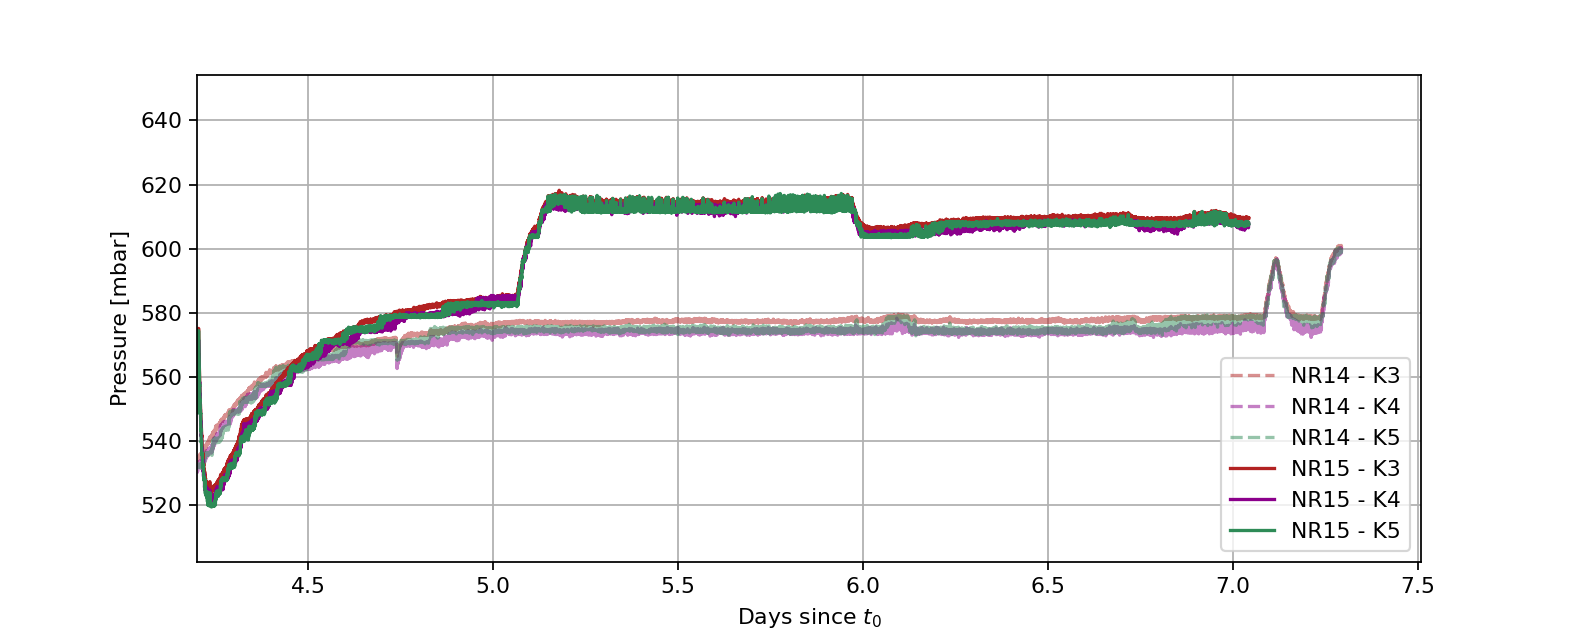

In [15]:
# %matplotlib notebook
f = plt.figure(figsize = (10,4))
a = plt.gca()
a.set_xlabel(r'Days since $t_0$')
a.set_ylabel('Pressure [mbar]')

ls_NR14 = "--"
ls_NR15 = "-"

c_P1 = 'dodgerblue'
c_K3 = 'firebrick'
c_K4 = 'darkmagenta'
c_K5 = 'seagreen'
c_K6 = 'goldenrod'
c_P2 = 'darkgrey'
c_P3 = 'olivedrab'

## Plot the MACRT data for Run 14
# a.plot(NR14_time_plc, data_plc_NR14['P1 mbar'], label='NR14 - P1', color=c_P1, ls=ls_NR14)
a.plot(NR14_time_plc, data_plc_NR14['K3 mbar'], label='NR14 - K3', color=c_K3, ls=ls_NR14,alpha=0.5)
a.plot(NR14_time_plc, data_plc_NR14['K4 mbar'], label='NR14 - K4', color=c_K4, ls=ls_NR14,alpha=0.5)
a.plot(NR14_time_plc, data_plc_NR14['K5 mbar'], label='NR14 - K5', color=c_K5, ls=ls_NR14,alpha=0.5)
# a.plot(NR14_time_plc, data_plc_NR14['K6 mbar'], label='NR14 - K6', color=c_K6, ls=ls_NR14)
# a.plot(NR14_time_plc, data_plc_NR14['P2 mbar'], label='NR14 - P2', color=c_P2, ls=ls_NR14)
# a.plot(NR14_time_plc, data_plc_NR14['P3 mbar'], label='NR14 - P3', color=c_P3, ls=ls_NR14)

# ## Plot the MACRT data for Run 15
# a.plot(NR15_time_plc, data_plc_NR15['P1 mbar'], label='NR15 - P1', color=c_P1, ls=ls_NR15)
a.plot(NR15_time_plc, data_plc_NR15['K3 mbar'], label='NR15 - K3', color=c_K3, ls=ls_NR15)
a.plot(NR15_time_plc, data_plc_NR15['K4 mbar'], label='NR15 - K4', color=c_K4, ls=ls_NR15)
a.plot(NR15_time_plc, data_plc_NR15['K5 mbar'], label='NR15 - K5', color=c_K5, ls=ls_NR15)
# a.plot(NR15_time_plc, data_plc_NR15['K6 mbar'], label='NR15 - K6', color=c_K6, ls=ls_NR15)
# a.plot(NR15_time_plc, data_plc_NR15['P2 mbar'], label='NR15 - P2', color=c_P2, ls=ls_NR15)
# a.plot(NR15_time_plc, data_plc_NR15['P3 mbar'], label='NR15 - P3', color=c_P3, ls=ls_NR15)

# a.set_yscale('log')

plt.grid()
plt.legend(loc="lower right")
# f.autofmt_xdate()
# myFmt = mdates.DateFormatter('%H:%M:%S')
# a.xaxis.set_major_formatter(myFmt)

<IPython.core.display.Javascript object>


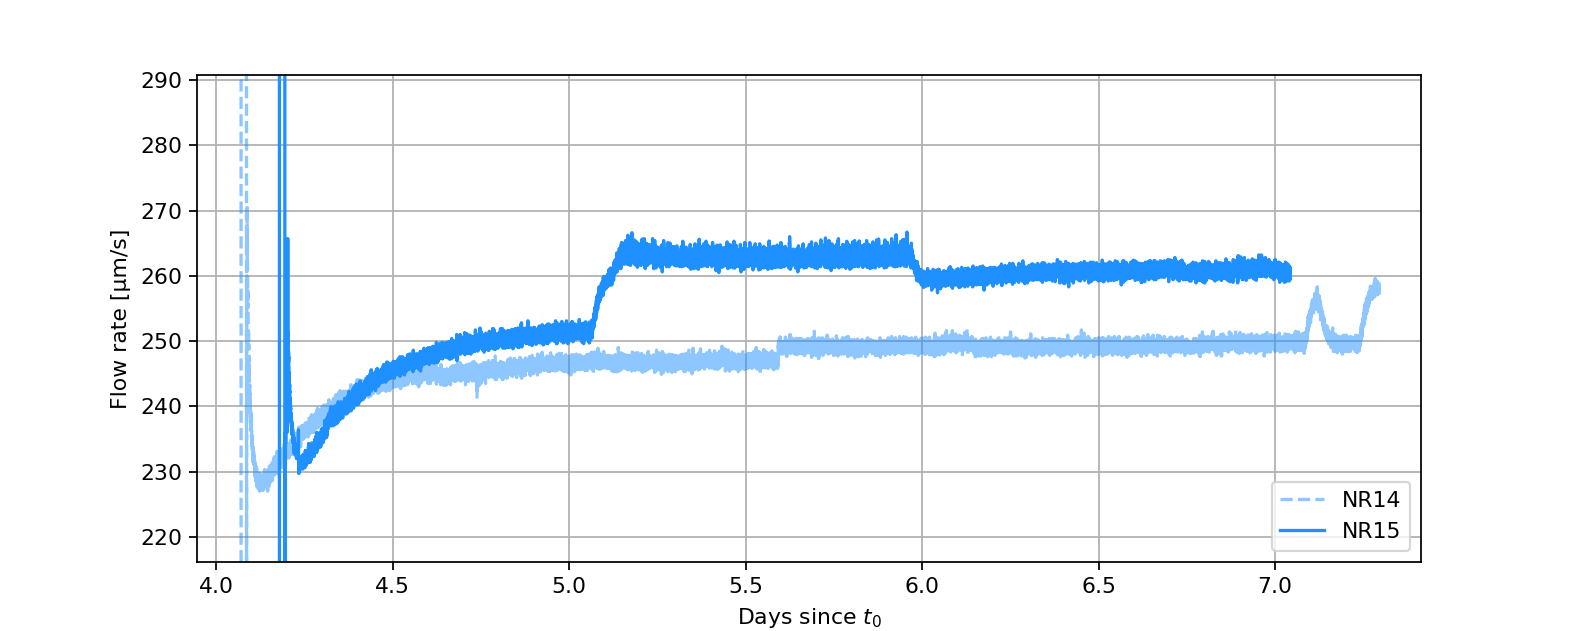

In [21]:
# %matplotlib notebook
f = plt.figure(figsize = (10,4))
a = plt.gca()
a.set_xlabel(r'Days since $t_0$')
a.set_ylabel('Flow rate [µm/s]')

ls_NR14 = "--"
ls_NR15 = "-"

c_FR = 'dodgerblue'

## Plot the PLC data for Run 14
a.plot(NR14_time_plc, data_plc_NR14[data_plc_NR14.keys()[8]], label='NR14', color=c_FR, ls=ls_NR14,alpha=0.5)

# ## Plot the PLC data for Run 15
a.plot(NR15_time_plc, data_plc_NR15[data_plc_NR15.keys()[8]], label='NR15', color=c_FR, ls=ls_NR15)

# a.set_yscale('log')

plt.grid()
plt.legend(loc="lower right")
# f.autofmt_xdate()
# myFmt = mdates.DateFormatter('%H:%M:%S')
# a.xaxis.set_major_formatter(myFmt)